<a href="https://colab.research.google.com/github/Ed-Marcavage/PyTorch/blob/Exercises/Workflow_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [26]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [27]:
# Create *known* parameters
weight = 0.7 # B
bias = 0.3 # A

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [28]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

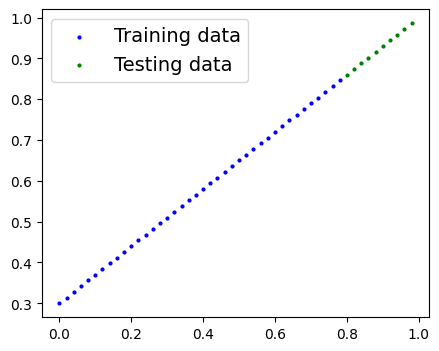

In [29]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(5, 4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

In [30]:
class ExerciseModel_v0(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias


torch.manual_seed(42)
model_0 = ExerciseModel_v0()
model_0,model_0.state_dict()

(ExerciseModel_v0(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [31]:
next(model_0.parameters()).device

device(type='cpu')

In [32]:
loss_fn = nn.L1Loss()
optim_fn = torch.optim.SGD(model_0.parameters(), 0.01)

In [33]:
# Instantiate the model and put it to the target device
model_0.to(device)
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
torch.manual_seed(42)


epoch = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epoch):
  model_0.train();

  # Forward Pass
  y_prediction = model_0(X_train)

  # Calc Loss
  loss = loss_fn(y_prediction, y_train)

  # Optimize Zero Grad
  optim_fn.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer Step
  optim_fn.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Testing mode
    model_0.eval()
    with torch.inference_mode():
      # Forward Pass
      test_prediction = model_0(X_test)
      # Calc Loss
      test_loss = loss_fn(test_prediction, y_test)
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.313 | Test loss: 0.481
Epoch: 20 | Train loss: 0.089 | Test loss: 0.217
Epoch: 40 | Train loss: 0.045 | Test loss: 0.114
Epoch: 60 | Train loss: 0.038 | Test loss: 0.089
Epoch: 80 | Train loss: 0.031 | Test loss: 0.072
Epoch: 100 | Train loss: 0.024 | Test loss: 0.056
Epoch: 120 | Train loss: 0.018 | Test loss: 0.041
Epoch: 140 | Train loss: 0.011 | Test loss: 0.024
Epoch: 160 | Train loss: 0.004 | Test loss: 0.008
Epoch: 180 | Train loss: 0.009 | Test loss: 0.005
Epoch: 200 | Train loss: 0.009 | Test loss: 0.005
Epoch: 220 | Train loss: 0.009 | Test loss: 0.005
Epoch: 240 | Train loss: 0.009 | Test loss: 0.005
Epoch: 260 | Train loss: 0.009 | Test loss: 0.005
Epoch: 280 | Train loss: 0.009 | Test loss: 0.005


In [36]:
# Make predictions with the model
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [37]:
y_preds.cpu()

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

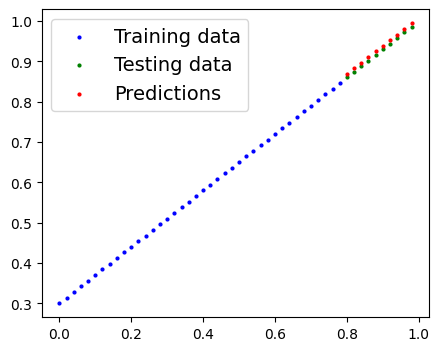

In [38]:
plot_predictions(predictions=y_preds);

In [39]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path
MODEL_NAME = "01_pytorch_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_model


In [41]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = ExerciseModel_v0()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model.to(device)

ExerciseModel_v0()

In [42]:
# Make predictions with loaded model and compare them to the previous
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])